# Capstone NN1

# Market Segmentation with Neural Networks

# Define Project Objectives

In this project, 

you will `build a neural network model` that can segment markets based on demographics, behavior, and other relevant factors. 

You will start by `exploring a dataset` of customer data, 

such as the `Online Retail Dataset` or the Bank Marketing Dataset, and `performing EDA` to gain insights into the data. 

You will `analyze the correlation between different features` and identify any `outliers` or `missing values` that need to be handled.

Datasets:-

Bank Marketing Data:
https://www.kaggle.com/datasets/henriqueyamahata/bank-marketing

`Online Retail Data`:
https://www.kaggle.com/datasets/carrie1/ecommerce-data

# Data Acquisition

Import libraries

In [695]:
import pandas as pd
import numpy as np

Data Importing for Online Retail Data

In [696]:
df = pd.read_csv("E-Commerce Data/data.csv", encoding='ISO-8859-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [697]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


In [698]:
df.sample(15)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
181213,552456,22431,WATERING CAN BLUE ELEPHANT,6,5/9/2011 14:40,1.95,13999.0,United Kingdom
116848,546306,35914,PINK CHICK EGG WARMER + EGG CUP,2,3/10/2011 16:16,0.83,NaN,United Kingdom
304897,563614,23203,JUMBO BAG VINTAGE DOILY,100,8/18/2011 8:51,1.79,12415.0,Australia
99641,544776,20723,STRAWBERRY CHARLOTTE BAG,18,2/23/2011 11:39,2.46,NaN,United Kingdom
461930,575956,21889,WOODEN BOX OF DOMINOES,1,11/13/2011 12:17,1.25,14487.0,United Kingdom
68574,541870,22660,DOORMAT I LOVE LONDON,1,1/24/2011 9:39,14.13,NaN,United Kingdom
480617,577314,22847,BREAD BIN DINER STYLE IVORY,4,11/18/2011 13:23,14.95,12444.0,Norway
82635,543242,21524,DOORMAT SPOTTY HOME SWEET HOME,4,2/4/2011 14:03,7.95,15090.0,United Kingdom
32730,539111,84877D,BLUE ROUND COMPACT MIRROR,24,12/16/2010 11:11,1.25,14414.0,United Kingdom
398218,571227,21116,OWL DOORSTOP,6,10/14/2011 13:54,4.95,12477.0,Germany


+ InvoiceNo
    - a `6-digit` integral number `uniquely` assigned to each `transaction`. 
    - If this `code starts` with letter '`c`', it indicates a `cancellation`

+ StockCode
     - a `5-digit` integral number `uniquely` assigned to each distinct `product`

+ Description
    - `product name`

+ Quantity
    - the `quantities` of each `product` (item) per `transaction`

+ InvoiceDate
    - the `day` and `time` when each `transaction` was generated

+ UnitPrice
    - `product price per unit`

+ CustomerID
    - a `5-digit` integral number `uniquely` assigned to each `customer`

+ Country
    - the `name` of the `country` where each `customer` resides

# Data Exploration

In [699]:
import matplotlib.pyplot as plt
import seaborn as sns

In [700]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


apply drop cols not needed for visualization

In [701]:
df.drop(columns=['InvoiceNo','CustomerID'], axis=1, inplace=True)
df.head(1)

,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,United Kingdom


clean `quantity` and `unitprice`

In [702]:
len(df[df['Quantity'] <= 0])

10624

In [703]:
len(df[df['UnitPrice'] <= 0])

2517

we will drop all rows that's less than or equal zero

In [704]:
df = df[~((df['Quantity'] <= 0) | (df['UnitPrice'] <= 0))]
df.shape

(530104, 6)

In [705]:
len(df[df['UnitPrice'] <= 0])

0

Statistical Suammary

In [706]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,530104.0,10.542037,155.524124,1.000,1.00,3.00,10.00,80995.00
UnitPrice,530104.0,3.907625,35.915681,0.001,1.25,2.08,4.13,13541.33


In [707]:
df.describe(include='object').T

,count,unique,top,freq
StockCode,530104,3922,85123A,2265
Description,530104,4026,WHITE HANGING HEART T-LIGHT HOLDER,2323
InvoiceDate,530104,18499,10/31/2011 14:41,1114
Country,530104,38,United Kingdom,485123


top 10 selling countries

In [708]:
df['Country'].nunique()

38

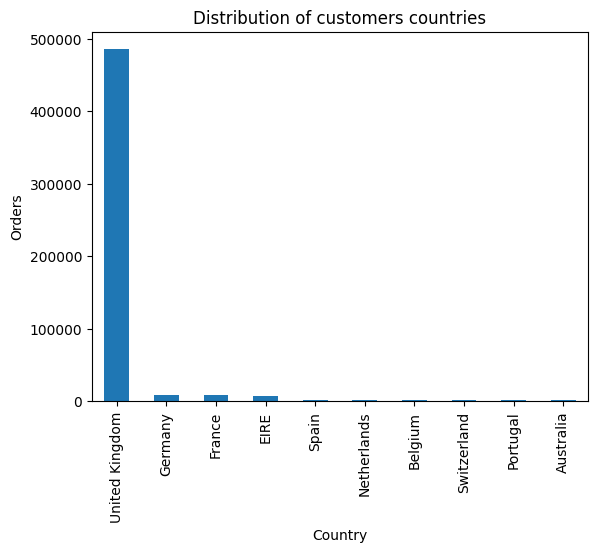

In [709]:
df['Country'].value_counts().sort_values(ascending=False).head(10).plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Orders')
plt.title('Distribution of customers countries')
plt.show()

In [710]:
top_countries = df['Country'].value_counts().sort_values(ascending=False).head(10).index.to_list()
top_countries

['United Kingdom',
 'Germany',
 'France',
 'EIRE',
 'Spain',
 'Netherlands',
 'Belgium',
 'Switzerland',
 'Portugal',
 'Australia']

Top 50 sold products

In [711]:
df['StockCode'].nunique()

3922

In [712]:
top_stokes = df['StockCode'].value_counts().head(50).index.to_list()
top_stokes

['85123A',
 '85099B',
 '22423',
 '47566',
 '20725',
 '84879',
 '22197',
 '22720',
 '21212',
 '20727',
 '22383',
 '22457',
 '23203',
 '22386',
 '22469',
 '22086',
 '21931',
 '22411',
 '22382',
 '20728',
 '22961',
 '23298',
 '22960',
 'POST',
 '22666',
 '23209',
 '22384',
 '82482',
 '22993',
 '22699',
 '22727',
 '23206',
 '22178',
 '20724',
 '22697',
 '20726',
 '23084',
 '21080',
 '22726',
 '23199',
 '22077',
 '22139',
 '21034',
 '22138',
 '85099C',
 '22470',
 '21790',
 '23301',
 '82494L',
 '84946']

plot `InvoiceDate` along year

In [713]:
df['InvoiceDate'].describe()

count               530104
unique               18499
top       10/31/2011 14:41
freq                  1114
Name: InvoiceDate, dtype: object

In [714]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['InvoiceDate'].dtype

dtype('<M8[ns]')

In [715]:
df['Day'] = df['InvoiceDate'].dt.day
df.head(1)

,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Day
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom,1


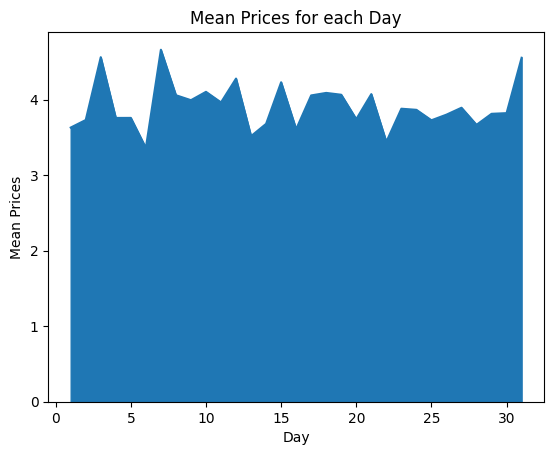

In [716]:
df.groupby('Day')['UnitPrice'].mean().plot(kind='area')
plt.xlabel('Day')
plt.ylabel('Mean Prices')
plt.title('Mean Prices for each Day')
plt.show()

we see that average pricess is the highest in `month #7` and the lowest in `month #6`

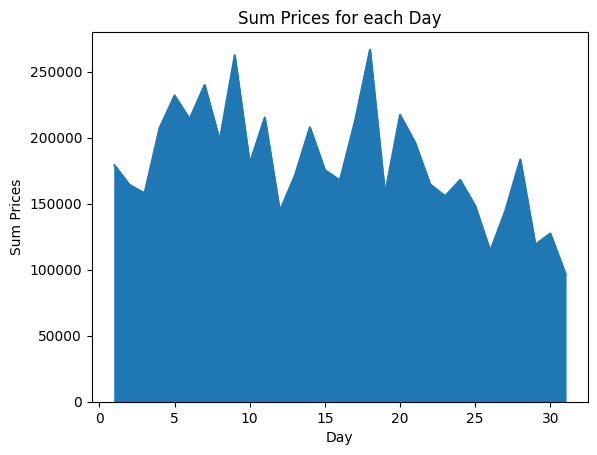

In [717]:
df.groupby('Day')['Quantity'].sum().plot(kind='area')
plt.xlabel('Day')
plt.ylabel('Sum Prices')
plt.title('Sum Prices for each Day')
plt.show()

we see that `sum quantity decreases` at the `end of the month`, and the `highest quantity` is in `middle of the month`

In [718]:
df['Month'] = df['InvoiceDate'].dt.month
df.head(1)

,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Day,Month
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom,1,12


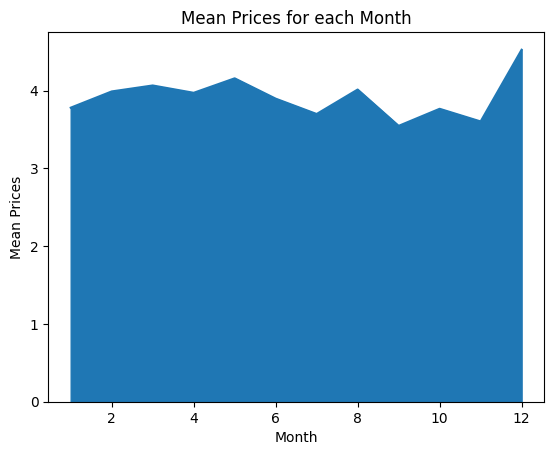

In [719]:
df.groupby(df['Month'])['UnitPrice'].mean().plot(kind='area')
plt.xlabel('Month')
plt.ylabel('Mean Prices')
plt.title('Mean Prices for each Month')
plt.show()

we see that average pricess is the highest in `month #12` and the lowest in `month #9`

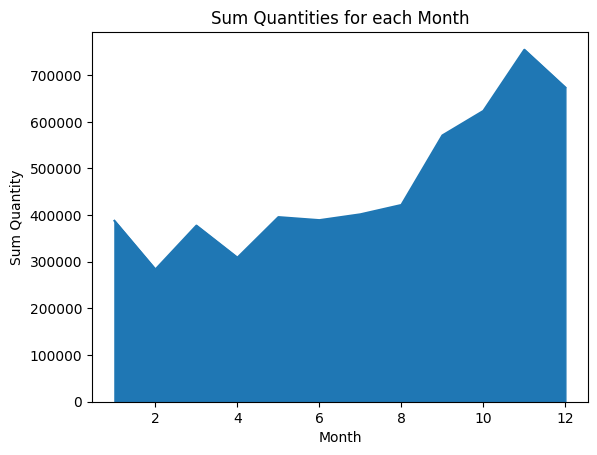

In [720]:
df.groupby('Month')['Quantity'].sum().plot(kind='area')
plt.xlabel('Month')
plt.ylabel('Sum Quantity')
plt.title('Sum Quantities for each Month')
plt.show()

we see that `sum quantity decreases` at the `beginning of the month`, and the `highest quantity` is at the `end of the month`

In [721]:
df['Year'] = df['InvoiceDate'].dt.year
df.head(1)

,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Day,Month,Year
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom,1,12,2010


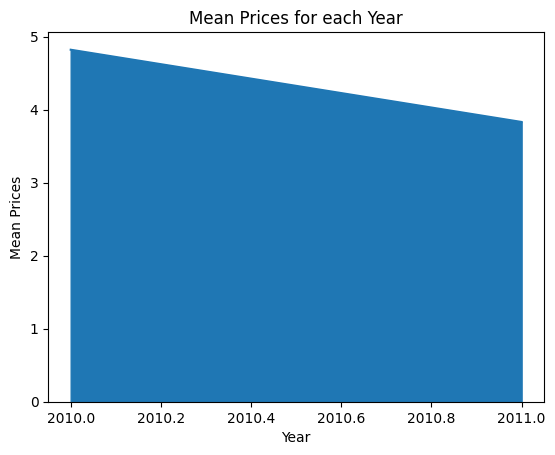

In [722]:
df.groupby('Year')['UnitPrice'].mean().plot(kind='area')
plt.xlabel('Year')
plt.ylabel('Mean Prices')
plt.title('Mean Prices for each Year')
plt.show()

ohh! we see that there is problem in `Prices` along year! Prices are the `highest at the beginning of the year` and the `lowest at the end of the year`

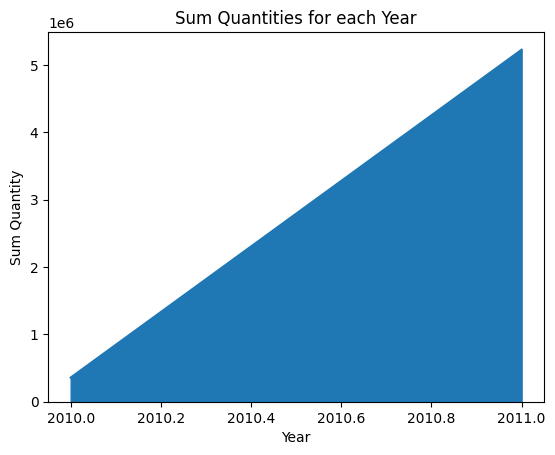

In [723]:
df.groupby('Year')['Quantity'].sum().plot(kind='area')
plt.xlabel('Year')
plt.ylabel('Sum Quantity')
plt.title('Sum Quantities for each Year')
plt.show()

wow! we see that `Quantities` are good along year! Quantities `increase` throughout the year

Top 10 descriptions


In [724]:
df['Description'].nunique()

4026

In [725]:
df['Description'].value_counts().head(10)

Description
WHITE HANGING HEART T-LIGHT HOLDER    2323
JUMBO BAG RED RETROSPOT               2112
REGENCY CAKESTAND 3 TIER              2017
PARTY BUNTING                         1706
LUNCH BAG RED RETROSPOT               1594
ASSORTED COLOUR BIRD ORNAMENT         1489
SET OF 3 CAKE TINS PANTRY DESIGN      1399
PACK OF 72 RETROSPOT CAKE CASES       1370
LUNCH BAG  BLACK SKULL.               1328
NATURAL SLATE HEART CHALKBOARD        1263
Name: count, dtype: int64

Analyze the correlation 

<Axes: >

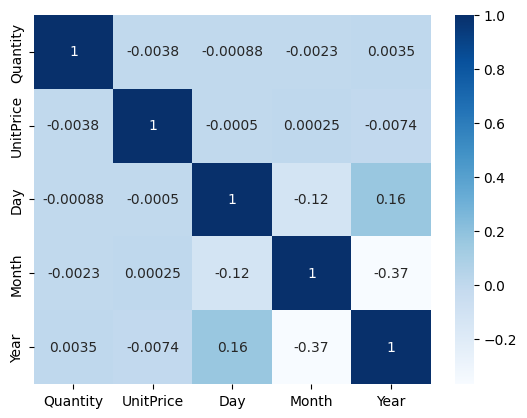

In [726]:
sns.heatmap(df.select_dtypes('number').corr(),
             annot= True,
             cmap='Blues')

handel outliers

In [727]:
def visualize_outliers(data):
    """
    Visualizes potential outliers in numeric columns of a DataFrame using box plots.

    Parameters:
        data (pd.DataFrame): The input DataFrame containing numeric features.

    Returns:
        None
    """    
    numeric_data = data.select_dtypes(include=['number'])
    plt.figure(figsize=(20, 7))
        
    for column in numeric_data.columns:
        plt.subplot(1, len(data.columns), data.columns.get_loc(column) + 1)
        sns.boxplot(y=data[column], orient="v", width=0.5, color='skyblue')
        plt.title(f'Box Plot of {column}')
    
    plt.tight_layout()
    plt.show()

c:\Users\CENTER_ELRahama\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\CENTER_ELRahama\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\CENTER_ELRahama\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\CENTER_ELRahama\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: Fut

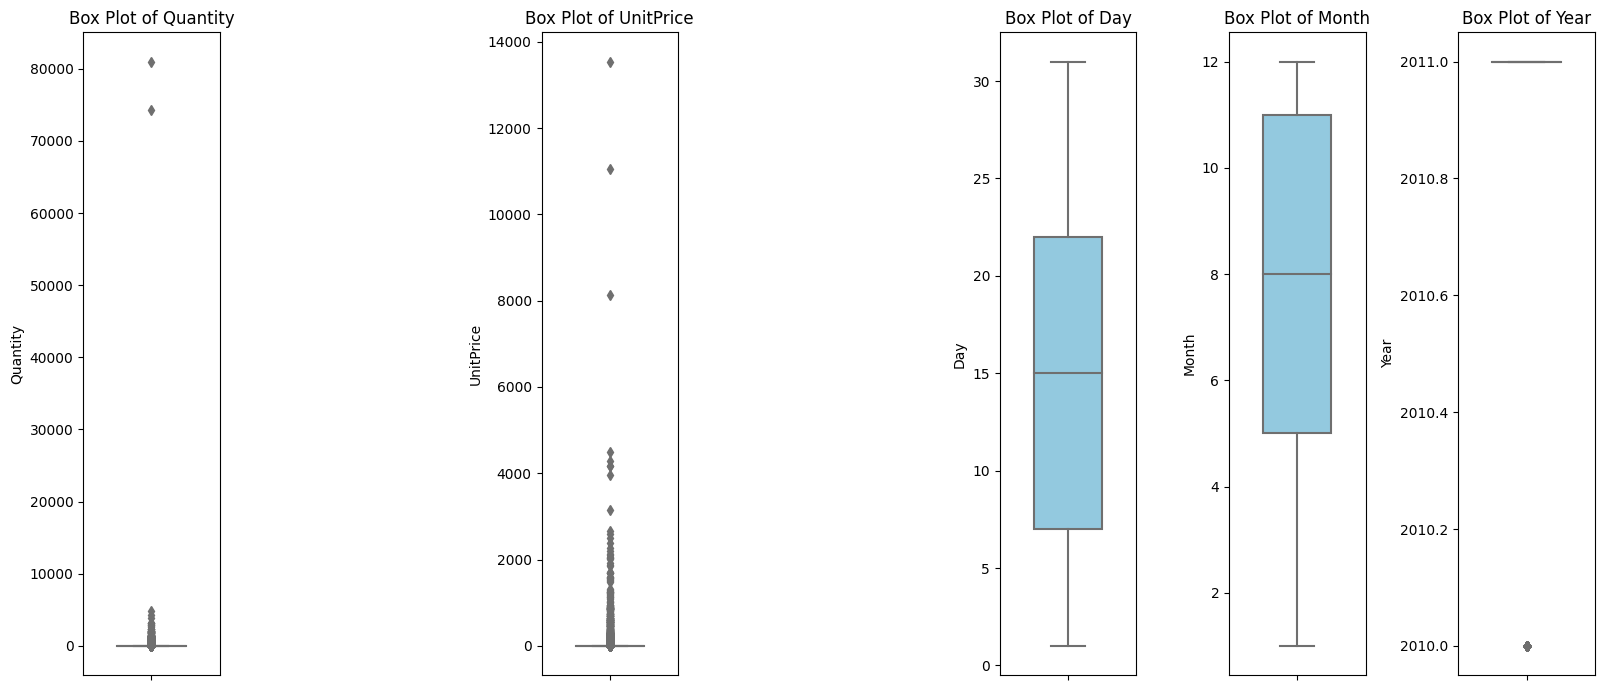

In [728]:
visualize_outliers(df)
plt.show()

There're a lot of outliers


In [729]:
df.shape

(530104, 9)

In [730]:
def remove_outliers_iqr(data, columns):
    """
    This function is used to remove outliers in a specific numerical column of a DataFrame 
    using the IQR (Interquartile Range) method.
    
    Args:
        data (DataFrame): The DataFrame containing the data.
        column (Series): The name of the numerical column in which you want to detect outliers

    Returns:
        filterd_data (DataFrame): Filtered data without the outliers
    """
    
    for column in columns:
        q1 = data[column].quantile(0.25)
        q3 = data[column].quantile(0.75)
        iqr = q3 - q1
        
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        
        filtered_data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    
    return filtered_data

In [731]:
df = remove_outliers_iqr(df, ['UnitPrice', 'Quantity'])
df.shape

(473741, 9)

# Data Preparation

In [732]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 473741 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   StockCode    473741 non-null  object        
 1   Description  473741 non-null  object        
 2   Quantity     473741 non-null  int64         
 3   InvoiceDate  473741 non-null  datetime64[ns]
 4   UnitPrice    473741 non-null  float64       
 5   Country      473741 non-null  object        
 6   Day          473741 non-null  int32         
 7   Month        473741 non-null  int32         
 8   Year         473741 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(3), int64(1), object(3)
memory usage: 30.7+ MB


In [733]:
df.shape

(473741, 9)

In [734]:
df.isna().sum()

StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
Country        0
Day            0
Month          0
Year           0
dtype: int64

handel missing values

In [735]:
df.dropna(inplace=True)
df.isna().sum()

StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
Country        0
Day            0
Month          0
Year           0
dtype: int64

In [736]:
df.shape

(473741, 9)

handel duplication

In [737]:
df.duplicated().sum()

5850

In [738]:
df.drop_duplicates(inplace=True)

In [739]:
df.shape

(467891, 9)

drop cols not needed for training

In [740]:
df.columns

Index(['StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice',
       'Country', 'Day', 'Month', 'Year'],
      dtype='object')

In [741]:
# df.drop(columns=['Description','InvoiceDate', 'StockCode', 'Country'], axis=1, inplace=True)
df.drop(columns=['Description','InvoiceDate'], axis=1, inplace=True)
df.head(1)

,StockCode,Quantity,UnitPrice,Country,Day,Month,Year
0,85123A,6,2.55,United Kingdom,1,12,2010


Encoding

In [742]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [743]:
cat_cols = df.select_dtypes(include='object')
for col in cat_cols:
    df[col] = encoder.fit_transform(df[col])

df.head()

,StockCode,Quantity,UnitPrice,Country,Day,Month,Year
0,3360,6,2.55,36,1,12,2010
1,2687,6,3.39,36,1,12,2010
2,2908,8,2.75,36,1,12,2010
3,2852,6,3.39,36,1,12,2010
4,2851,6,3.39,36,1,12,2010


In [744]:
X = df.drop(['Country'], axis=1)
y = df['Country']

Scalling

In [745]:
from sklearn.preprocessing import StandardScaler

In [746]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 1.99733104e+00,  2.81210060e-01, -4.40757937e-02,
        -1.61704592e+00,  1.26003969e+00, -3.40305139e+00],
       [ 1.24269757e+00,  2.81210060e-01, -2.20864426e-02,
        -1.61704592e+00,  1.26003969e+00, -3.40305139e+00],
       [ 1.49050440e+00,  7.30731692e-01, -3.88402339e-02,
        -1.61704592e+00,  1.26003969e+00, -3.40305139e+00],
       ...,
       [ 5.53099389e-01, -1.68311573e-01, -2.19131548e-03,
        -6.94431388e-01,  1.26003969e+00,  2.93853922e-01],
       [ 5.54220687e-01, -1.68311573e-01, -2.19131548e-03,
        -6.94431388e-01,  1.26003969e+00,  2.93853922e-01],
       [-6.17535580e-01, -3.93072389e-01,  1.87509236e-02,
        -6.94431388e-01,  1.26003969e+00,  2.93853922e-01]])

# Data Splitting

Model Selection

In [747]:
from sklearn.model_selection import train_test_split

In [748]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42)


In [749]:
X_train.shape

(374312, 6)

In [750]:
y_train.shape

(374312,)

In [751]:
X_test.shape

(93579, 6)

In [752]:
y_test.shape

(93579,)

# Neural Network Architecture

In [753]:
from tensorflow.keras import layers, Sequential
from tensorflow.keras.optimizers import Adam

In [754]:
model = Sequential()
model.add(layers.Dense(64,
                       activation='tanh',
                       input_shape=(X_train.shape[1],)
                       )
          )
model.add(layers.Dropout(0.5))

model.add(layers.Dense(32,
                       activation='relu')
        )
model.add(layers.Dropout(0.3))


model.add(layers.Dense(8,
                       activation='relu')
        )

model.add(layers.Dense(1))

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_34 (Dense)            (None, 64)                448       
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_35 (Dense)            (None, 32)                2080      
                                                                 
 dropout_5 (Dropout)         (None, 32)                0         
                                                                 
 dense_36 (Dense)            (None, 8)                 264       
                                                                 
 dense_37 (Dense)            (None, 1)                 9         
                                                                 
Total params: 2801 (10.94 KB)
Trainable params: 2801 (

In [755]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='mean_squared_error',
              metrics=['mean_absolute_error', 'mean_squared_error'])

# Mode Training

In [756]:
model.fit(X_train,
          y_train,
          validation_data=(X_test, y_test),
        #   batch_size=32,
          epochs=5)

Epoch 1/5


11698/11698 [==============================] - 97s 7ms/step - loss: 65.6575 - mean_absolute_error: 5.2722 - mean_squared_error: 65.6575 - val_loss: 32.0930 - val_mean_absolute_error: 3.0615 - val_mean_squared_error: 32.0930
Epoch 2/5
11698/11698 [==============================] - 70s 6ms/step - loss: 36.1599 - mean_absolute_error: 3.3598 - mean_squared_error: 36.1599 - val_loss: 31.8646 - val_mean_absolute_error: 2.8804 - val_mean_squared_error: 31.8646
Epoch 3/5
11698/11698 [==============================] - 76s 7ms/step - loss: 32.8132 - mean_absolute_error: 2.8257 - mean_squared_error: 32.8132 - val_loss: 31.6784 - val_mean_absolute_error: 2.6674 - val_mean_squared_error: 31.6784
Epoch 4/5
11698/11698 [==============================] - 75s 6ms/step - loss: 32.7186 - mean_absolute_error: 2.8148 - mean_squared_error: 32.7186 - val_loss: 31.6782 - val_mean_absolute_error: 2.6978 - val_mean_squared_error: 31.6782
Epoch 5/5
11698/11698 [==============================] - 74s 6ms/step - lo

# Model Evaluation

In [757]:
y_pred= model.predict(X_test)
y_pred

2925/2925 [==============================] - 29s 3ms/step


array([[33.79091 ],
       [33.727875],
       [36.038097],
       ...,
       [35.29429 ],
       [36.577923],
       [35.14535 ]], dtype=float32)

In [758]:
y_pred= y_pred.reshape(-1,)
y_pred

array([33.79091 , 33.727875, 36.038097, ..., 35.29429 , 36.577923,
       35.14535 ], dtype=float32)

In [759]:
result = pd.DataFrame()
result['Actual'] = y_test.values # convert to numpy array
result['Predict'] = np.round(y_pred).astype(int)
result.head(10)

,Actual,Predict
0,36,34
1,36,34
2,36,36
3,36,35
4,36,34
5,36,34
6,36,36
7,36,36
8,36,34
9,36,35


In [760]:
result.tail(10)

,Actual,Predict
93569,13,33
93570,36,35
93571,10,34
93572,36,34
93573,36,33
93574,36,36
93575,36,33
93576,14,35
93577,36,37
93578,36,35


In [761]:
loss, mae, mse = model.evaluate(X_test, y_test)

2925/2925 [==============================] - 22s 4ms/step - loss: 31.6763 - mean_absolute_error: 2.6434 - mean_squared_error: 31.6763


In [762]:
loss

31.676286697387695

In [763]:
mae

2.6434288024902344

In [764]:
mse

31.676286697387695

In [766]:
from sklearn.metrics import r2_score

In [769]:
r2_score(y_test, 
         y_pred.reshape(-1,))

0.05332875670871129

# Save Model

In [770]:
model.save('best_model.h5')

c:\Users\CENTER_ELRahama\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
